<p align="center">
<img src="graphics./graph_1.png" alt="graph_1" style="width:500px;"/>
</p>

In [1]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import seaborn as sns
import missingno as msno
import matplotlib.pyplot as plt

data = pd.read_csv('DailyDelhiClimateTrain.csv')
data_test = pd.read_csv('DailyDelhiClimateTest.csv')

In [2]:
data['date'] = pd.to_datetime(data['date'])
data_test['date'] = pd.to_datetime(data_test['date'])

data.sort_values(by = 'date')
data_test.sort_values(by = 'date');

In [3]:
data.head()

,date,meantemp,humidity,wind_speed,meanpressure
0,2013-01-01,10.000000,84.500000,0.000000,1015.666667
1,2013-01-02,7.400000,92.000000,2.980000,1017.800000
2,2013-01-03,7.166667,87.000000,4.633333,1018.666667
3,2013-01-04,8.666667,71.333333,1.233333,1017.166667
4,2013-01-05,6.000000,86.833333,3.700000,1016.500000


In [4]:
print("A shape of the dataset: {}".format(data.shape))

A shape of the dataset: (1462, 5)


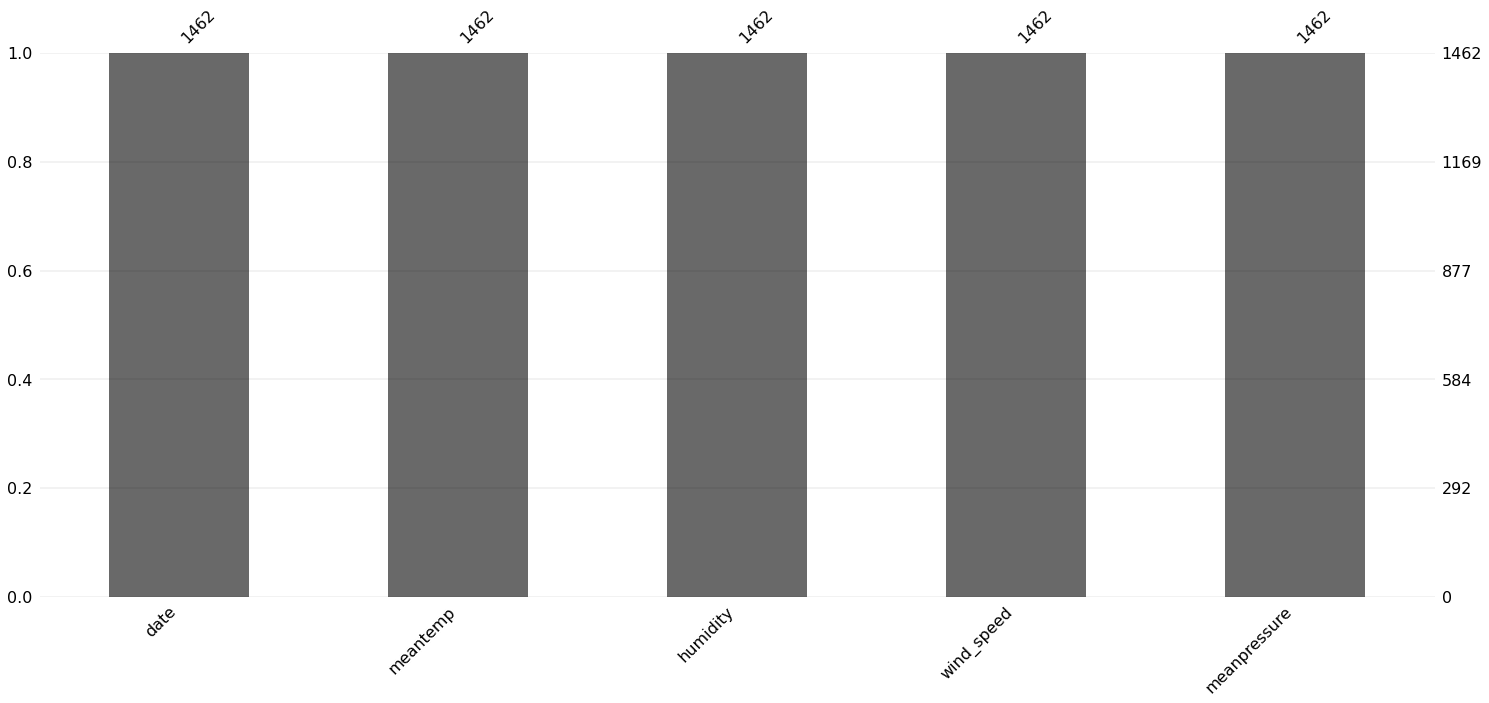

In [5]:
ax = msno.bar(data)

ax.grid(axis = 'y', linewidth = 0.1, color = "black")
plt.show()

In [6]:
round(data.describe().T, 3)

,count,mean,std,min,25%,50%,75%,max
meantemp,1462.0,25.496,7.348,6.000,18.857,27.714,31.306,38.714
humidity,1462.0,60.772,16.770,13.429,50.375,62.625,72.219,100.000
wind_speed,1462.0,6.802,4.562,0.000,3.475,6.222,9.238,42.220
meanpressure,1462.0,1011.105,180.232,-3.042,1001.580,1008.563,1014.945,7679.333


In [7]:
Q1 = np.percentile(data['meanpressure'] , 25)
Q3 = np.percentile(data['meanpressure'] , 75)

IQR = Q3 - Q1
upper = Q3 + 1.5 * IQR
lower = Q1 - 1.5 * IQR

data['meanpressure'] = np.where(np.logical_or(data['meanpressure'] >= upper, data['meanpressure'] <= lower), data['meanpressure'].mean(), data['meanpressure'])

In [8]:
round(data.describe().T, 3)

,count,mean,std,min,25%,50%,75%,max
meantemp,1462.0,25.496,7.348,6.000,18.857,27.714,31.306,38.714
humidity,1462.0,60.772,16.770,13.429,50.375,62.625,72.219,100.000
wind_speed,1462.0,6.802,4.562,0.000,3.475,6.222,9.238,42.220
meanpressure,1462.0,1008.286,7.418,991.375,1001.631,1008.670,1014.875,1023.000


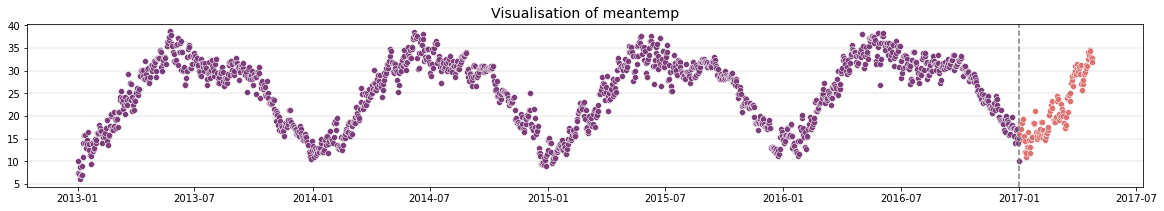

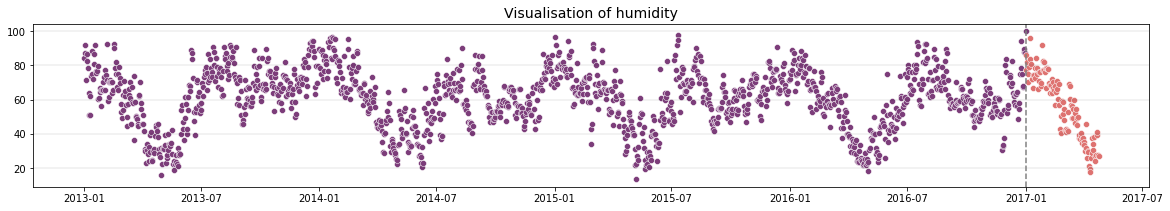

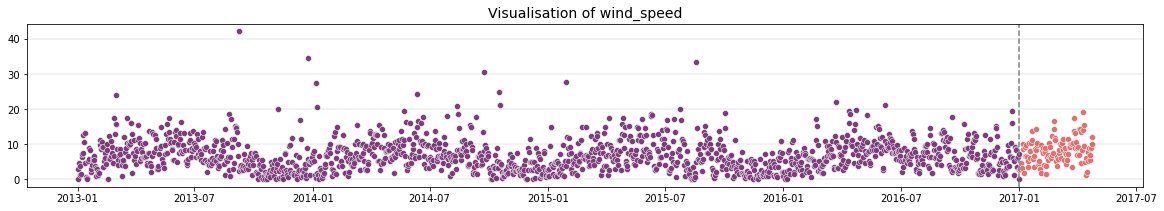

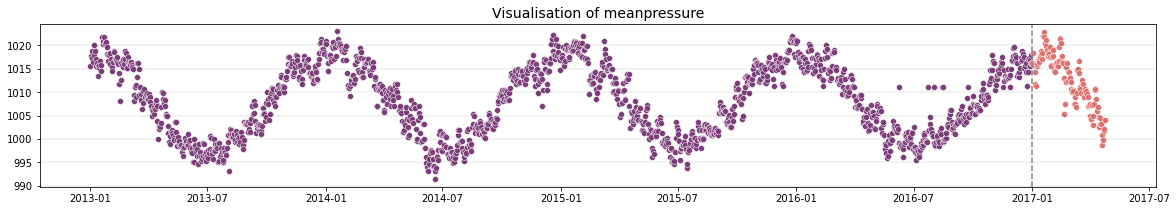

In [9]:
for i in data.columns[1:]:
    
    fig = plt.figure(figsize = (20, 3))
    ax = sns.scatterplot(x = 'date', y = i, data = data, color = "#7c3d7a")
    ax = sns.scatterplot(x = 'date', y = i, data = data_test, color = "#de7270")
    
    plt.axvline(min(data_test['date']), color = 'gray', linestyle = '--', linewidth = 1.5)
    ax.grid(axis = 'y', linewidth = 0.1, color = "black")
    ax.set_xlabel('')
    ax.set_ylabel('')
    
    plt.title('Visualisation of '+ i, fontsize = 14)
    plt.show()

In [10]:
def plot_year(column):
    
    for i in data['date'].dt.year.unique()[:-1]:
        
        fig = plt.figure(figsize = (20, 3))
        ax = sns.lineplot(x = 'date', y = column, data = data[data['date'].dt.year == i], color = "#7c3d7a")
        
        ax.grid(axis = 'y', linewidth = 0.1, color = "black")
        ax.set_xlabel('')
        ax.set_ylabel('')
        
        plt.title('Visualisation of '+ str(column) + ' in ' + str(i), fontsize = 14)
        plt.show()

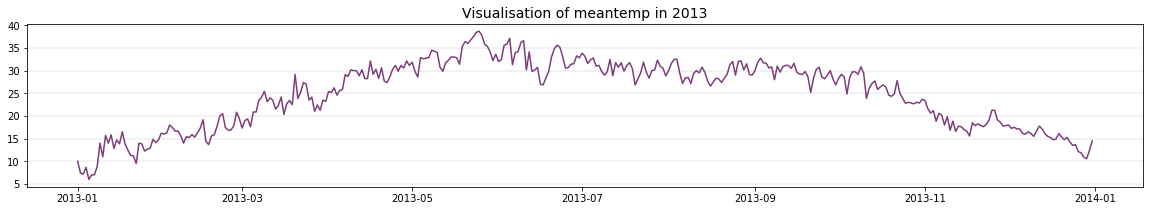

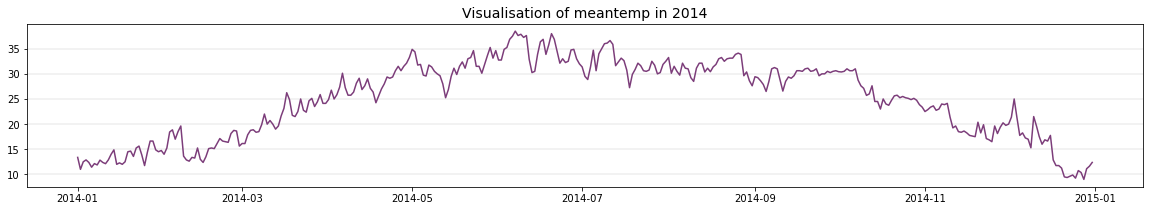

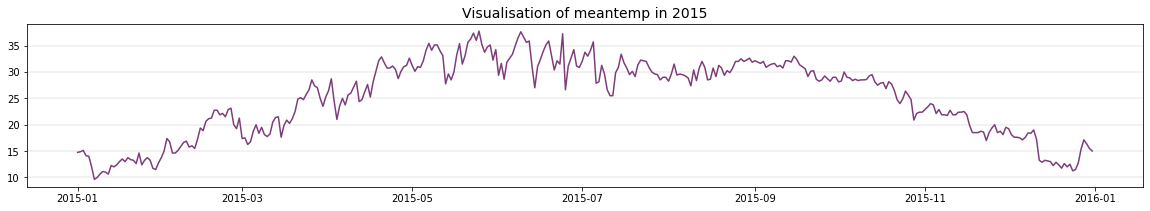

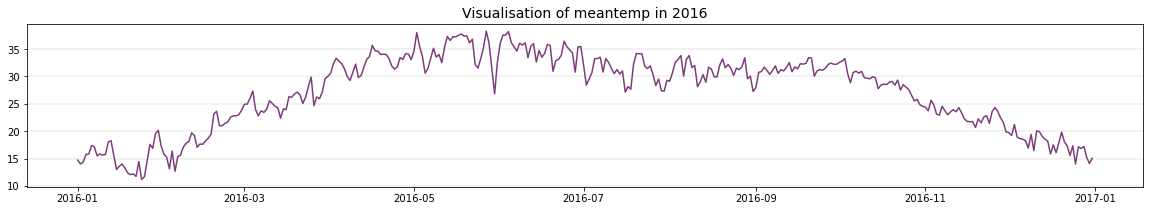

In [11]:
plot_year('meantemp')

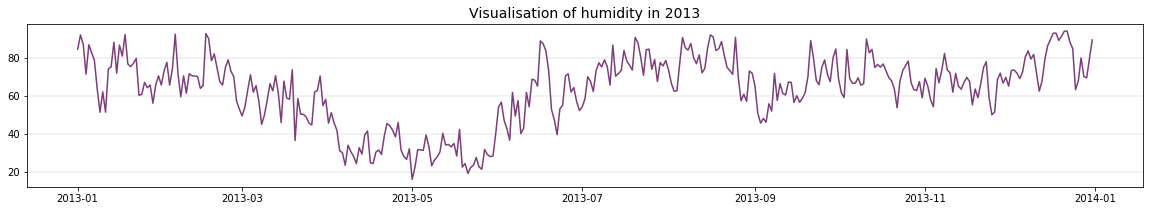

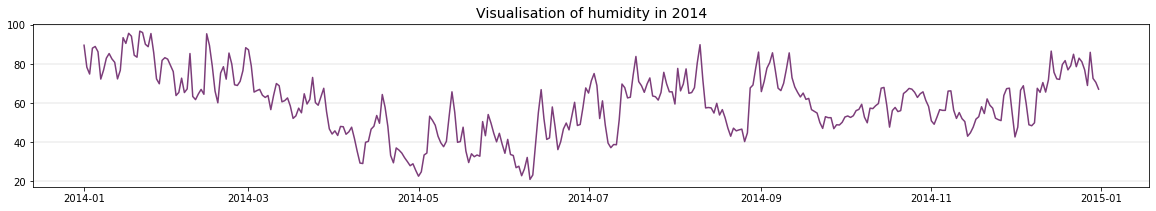

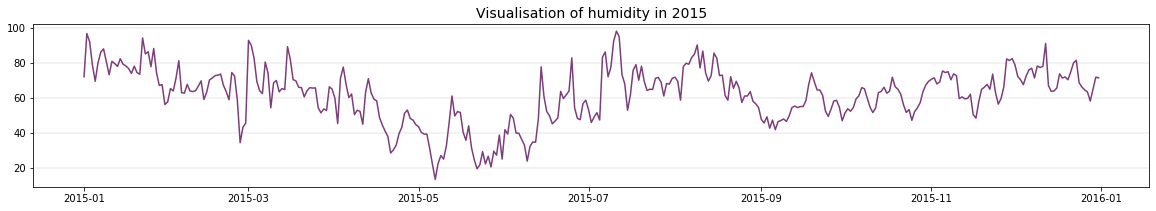

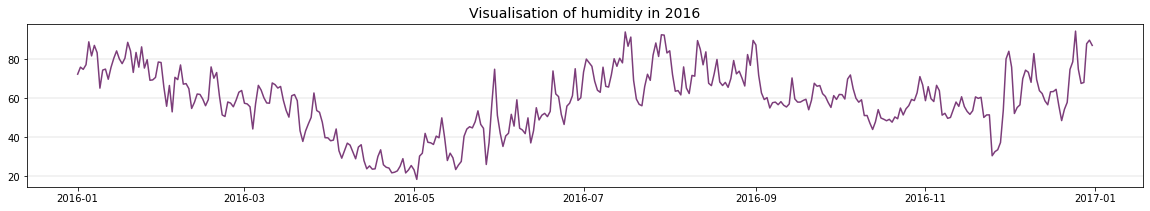

In [12]:
plot_year('humidity')

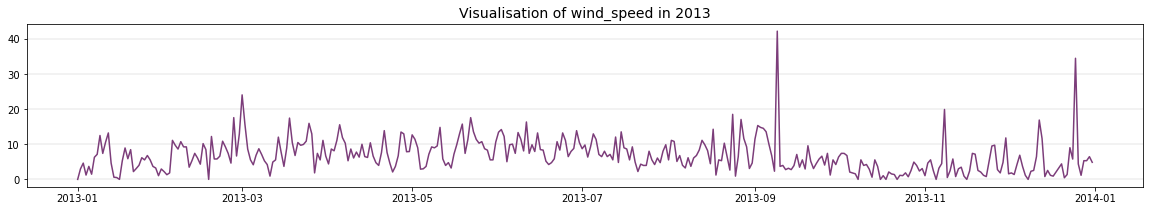

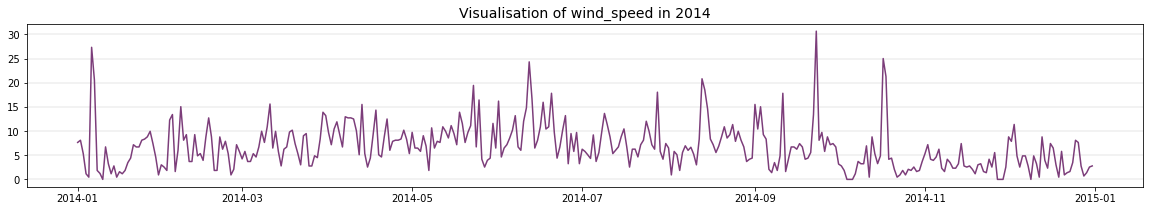

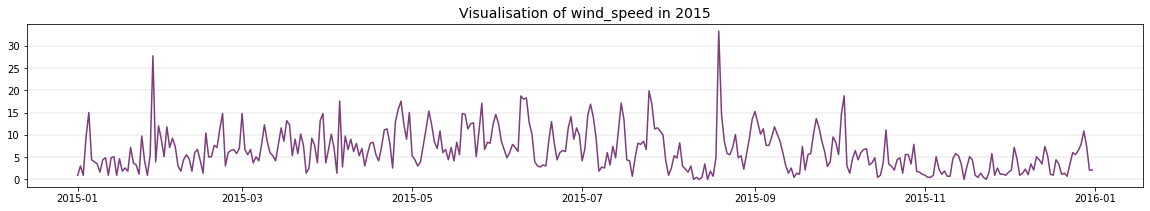

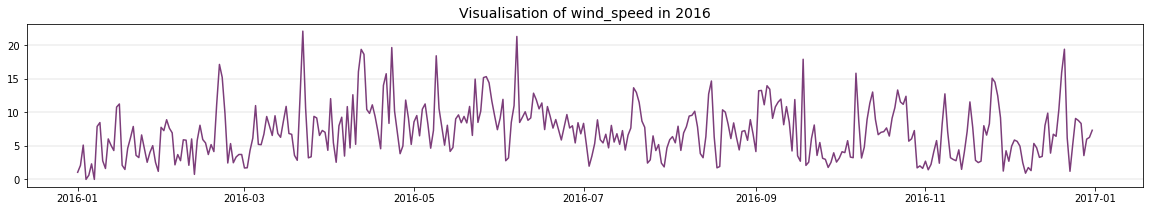

In [13]:
plot_year('wind_speed')

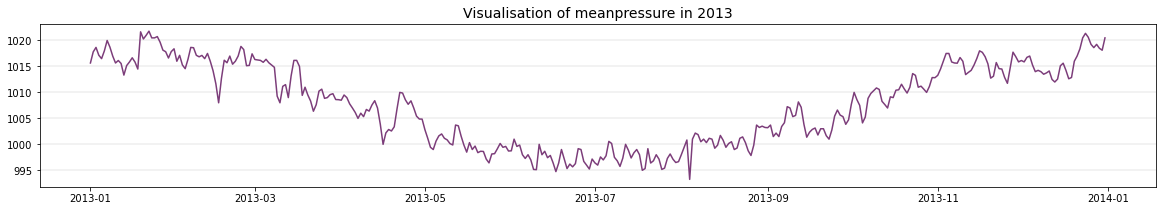

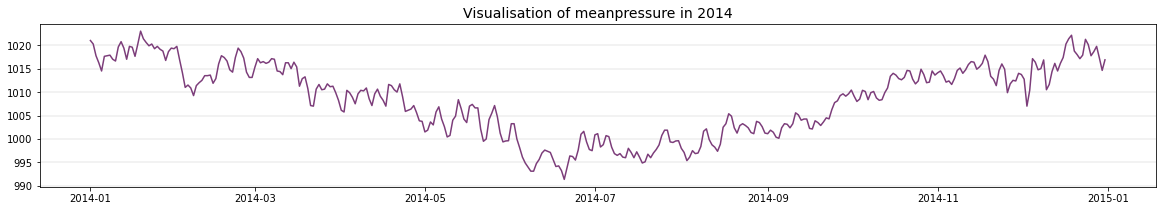

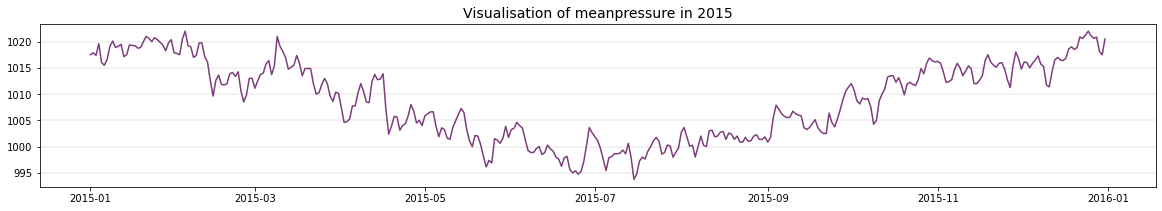

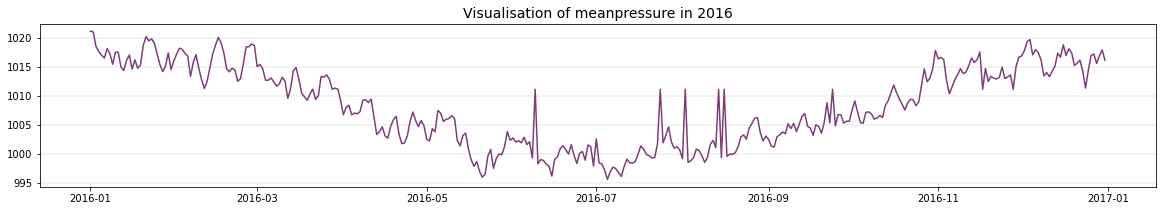

In [14]:
plot_year('meanpressure')

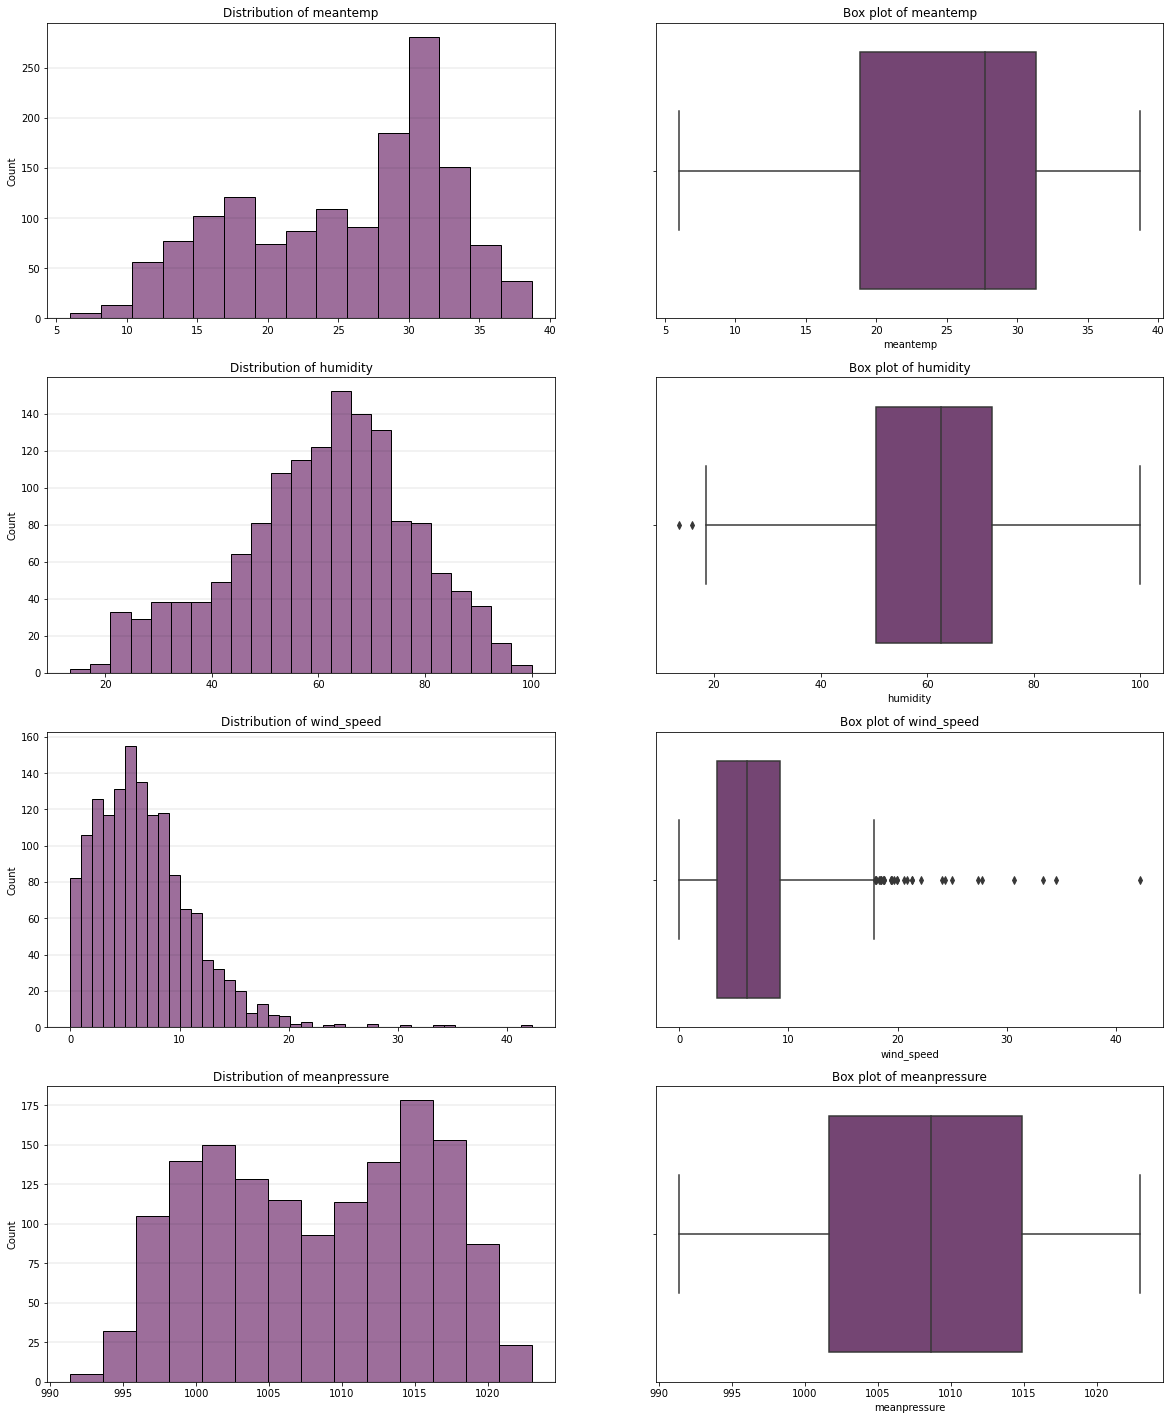

In [15]:
fig, ax = plt.subplots(nrows = 4, ncols = 2, figsize = (20, 25))

for i, col in enumerate(data.columns[1:]):
    
    ax_left = ax[i][0]
    ax_right = ax[i][1]
    
    sns.histplot(data[col], color = "#7c3d7a", ax = ax_left)
    sns.boxplot(col, data = data, color = "#7c3d7a", ax = ax_right)
    
    ax_left.set_title(f'Distribution of {col}')
    ax_right.set_title(f'Box plot of {col}')
    
    ax_left.grid(axis = 'y', linewidth = 0.1, color = 'black')
    ax_left.set_xlabel('')
    
plt.show()

In [77]:
from statsmodels.tsa.stattools import adfuller, acf, pacf
from statsmodels.tsa.seasonal import seasonal_decompose

In [63]:
adf_meantemp = adfuller(data['meantemp'])

print('Augmented Dickey-Fuller test\n')
print(f'Test statistic:  {adf_meantemp[0]}')
print(f'p-value:  {adf_meantemp[1]}')

Augmented Dickey-Fuller test

Test statistic:  -2.0210690559206705
p-value:  0.2774121372301612


In [17]:
decomp = seasonal_decompose(x = data['meantemp'], model = 'additive', period = 365)

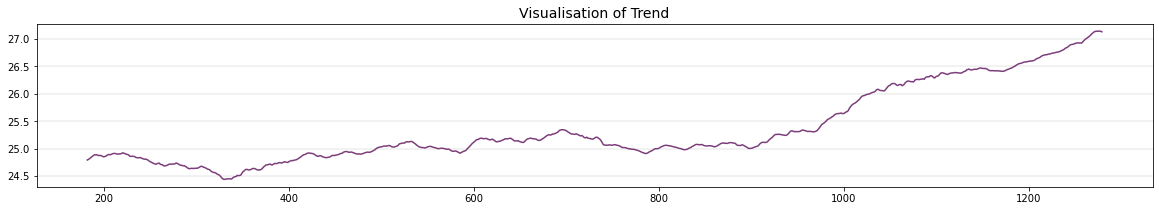

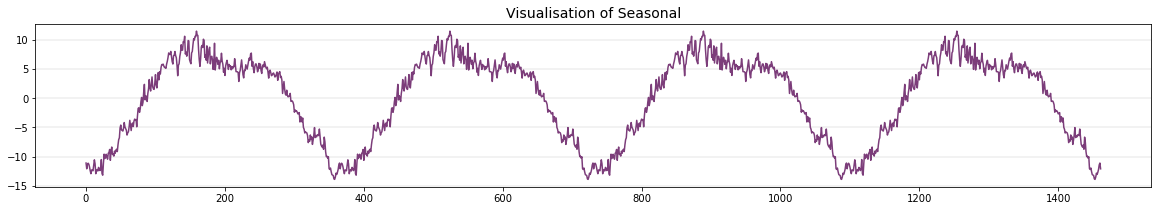

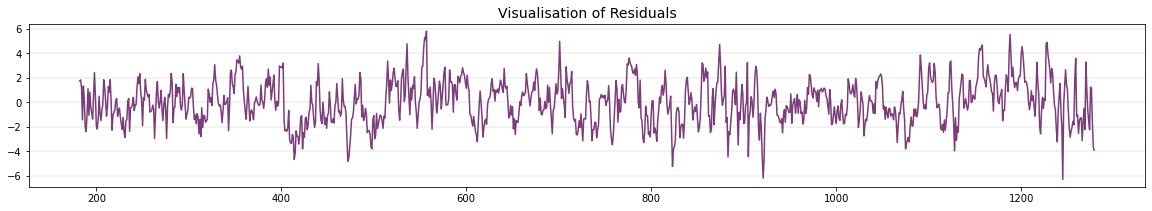

In [18]:
decompt_dict = {'Trend' : decomp.trend, 'Seasonal' : decomp.seasonal, 'Residuals' : decomp.resid}

for key, value in decompt_dict.items():
    
    fig = plt.figure(figsize = (20, 3))
    plt.plot(value, color = "#7c3d7a")
    
    plt.grid(axis = 'y', linewidth = 0.1, color = "black")
    plt.xlabel('')
    plt.ylabel('')
    
    plt.title('Visualisation of '+ key, fontsize = 14)
    plt.show()

<p align="center">
<img src="graphics./graph_2.png" alt="graph_2" style="width:500px;"/>
</p>

In [53]:
from sklearn.preprocessing import StandardScaler
from keras.layers.core import Dense, Dropout
from keras.layers import LSTM
from keras.models import Sequential

In [24]:
data_full = pd.concat((data, data_test), ignore_index = True)
data_full.sort_values(by = 'date');

In [25]:
print("A shape of the concatenated dataset: {}".format(data_full.shape))

A shape of the concatenated dataset: (1576, 5)


In [26]:
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_full.drop(columns = 'date'))
data_scaled = pd.DataFrame(data_scaled, columns = data_full.columns[1:])

data_scaled.head()

,meantemp,humidity,wind_speed,meanpressure
0,-2.073073,1.417103,-1.530010,0.959131
1,-2.427167,1.858940,-0.869152,1.248122
2,-2.458944,1.564382,-0.502502,1.365524
3,-2.254659,0.641435,-1.256500,1.162327
4,-2.617833,1.554564,-0.709482,1.072018


In [27]:
def time_train_test(feature, target, ratio):
    
    train_size = int(len(feature) * ratio)

    X_train = feature[0:train_size]
    y_train = target[0:train_size]

    X_test = feature[train_size: len(feature)]
    y_test = target[train_size: len(feature)]

    return X_train, X_test, y_train, y_test

In [28]:
def create_window(target, feature, window):
    
    feature_new = []
    target_new = []
    
    feature_np = feature.to_numpy()
    target_np = target.to_numpy()
    
    for i in range(window, target.shape[0]):
        
        feature_list = feature_np[i - window:i]
        feature_new.append(feature_list.reshape(window, feature_np.shape[1]))
        target_new.append(target_np[i].reshape(1))
        
    return np.array(feature_new), np.array(target_new)

In [29]:
feature, target = create_window(data_scaled['meantemp'], data_scaled, window = 10)

In [30]:
pd.DataFrame(feature[0], columns = data_scaled.columns)

,meantemp,humidity,wind_speed,meanpressure
0,-2.073073,1.417103,-1.530010,0.959131
1,-2.427167,1.858940,-0.869152,1.248122
2,-2.458944,1.564382,-0.502502,1.365524
3,-2.254659,0.641435,-1.256500,1.162327
4,-2.617833,1.554564,-0.709482,1.072018
5,-2.481643,1.316954,-1.201798,1.275215
6,-2.481643,1.069525,-0.132895,1.546143
7,-2.228718,0.192585,0.054021,1.371975
8,-1.528313,-0.541705,1.242043,1.139750
9,-1.936883,0.091594,0.111046,0.959131


In [31]:
X_train, X_test, y_train, y_test = time_train_test(feature, target, 0.8)

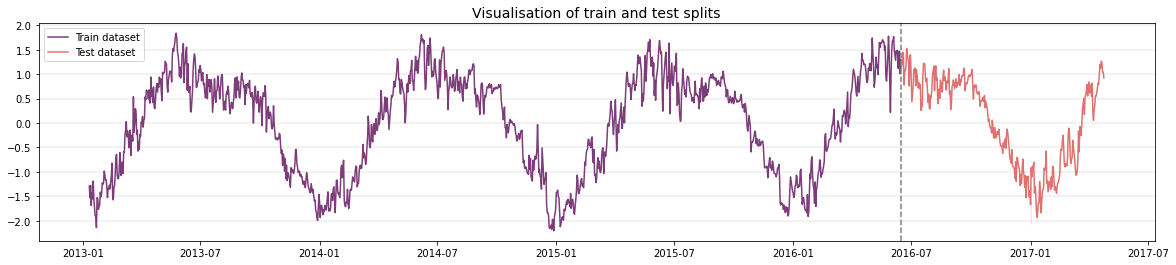

In [32]:
fig = plt.figure(figsize = (20, 4))

ax = sns.lineplot(x = data_full['date'].iloc[10:len(y_train) + 10], y = y_train[:,0], color = '#7c3d7a', label = 'Train dataset')
ax = sns.lineplot(x = data_full['date'].iloc[10 + len(y_train):], y = y_test[:,0], color = "#de7270", label = 'Test dataset')

plt.axvline(data_full['date'].iloc[10 + len(y_train)], color = 'gray', linestyle = '--', linewidth = 1.5)
ax.grid(axis = 'y', linewidth = 0.1, color = "black")
ax.set_xlabel('')
ax.set_ylabel('')
    
plt.title('Visualisation of train and test splits', fontsize = 14)
plt.show()

In [33]:
model = Sequential()

model.add(LSTM(units = 100, return_sequences = True, input_shape = (X_train.shape[1], X_train.shape[2])))
model.add(Dropout(0.2))

model.add(LSTM(units = 100, return_sequences = True))
model.add(Dropout(0.2))

model.add(LSTM(units = 100, return_sequences = True))
model.add(Dropout(0.2))

model.add(LSTM(units = 50))
model.add(Dropout(0.2))

model.add(Dense(units = 1))
model.compile(optimizer = 'RMSProp', loss = 'mean_squared_error')

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 10, 100)           42000     
                                                                 
 dropout (Dropout)           (None, 10, 100)           0         
                                                                 
 lstm_1 (LSTM)               (None, 10, 100)           80400     
                                                                 
 dropout_1 (Dropout)         (None, 10, 100)           0         
                                                                 
 lstm_2 (LSTM)               (None, 10, 100)           80400     
                                                                 
 dropout_2 (Dropout)         (None, 10, 100)           0         
                                                                 
 lstm_3 (LSTM)               (None, 50)                3

In [34]:
result = model.fit(X_train, y_train, validation_data = [X_test, y_test], epochs = 50)

Epoch 1/50
40/40 [==============================] - 8s 70ms/step - loss: 0.1816 - val_loss: 0.1573
Epoch 2/50
40/40 [==============================] - 1s 30ms/step - loss: 0.1398 - val_loss: 0.1381
Epoch 3/50
40/40 [==============================] - 1s 30ms/step - loss: 0.1276 - val_loss: 0.1302
Epoch 4/50
40/40 [==============================] - 1s 31ms/step - loss: 0.1296 - val_loss: 0.1494
Epoch 5/50
40/40 [==============================] - 1s 31ms/step - loss: 0.1260 - val_loss: 0.1277
Epoch 6/50
40/40 [==============================] - 1s 30ms/step - loss: 0.1233 - val_loss: 0.1492
Epoch 7/50
40/40 [==============================] - 1s 33ms/step - loss: 0.1158 - val_loss: 0.1948
Epoch 8/50
40/40 [==============================] - 1s 29ms/step - loss: 0.1145 - val_loss: 0.1781
Epoch 9/50
40/40 [==============================] - 1s 30ms/step - loss: 0.1182 - val_loss: 0.1014
Epoch 10/50
40/40 [==============================] - 1s 29ms/step - loss: 0.1090 - val_loss: 0.1062
Epoch 11/

In [35]:
prediction = model.predict(X_test)

10/10 [==============================] - 1s 10ms/step


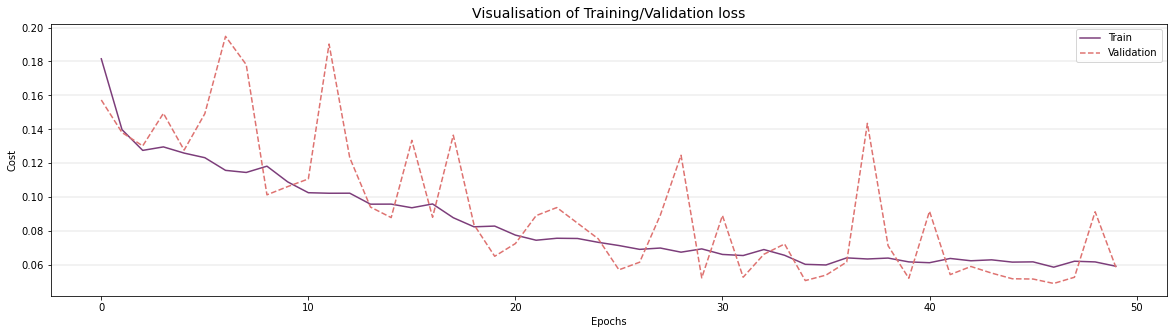

In [49]:
fig = plt.figure(figsize = (20, 5))

plt.plot(result.history['loss'], color = '#7c3d7a')
plt.plot(result.history['val_loss'], color = "#de7270", linestyle = '--', linewidth = 1.5)

plt.grid(axis = 'y', linewidth = 0.1, color = "black")

plt.legend(['Train', 'Validation'])
plt.xlabel('Epochs')
plt.ylabel('Cost')

plt.title('Visualisation of Training/Validation loss', fontsize = 14)
plt.show()

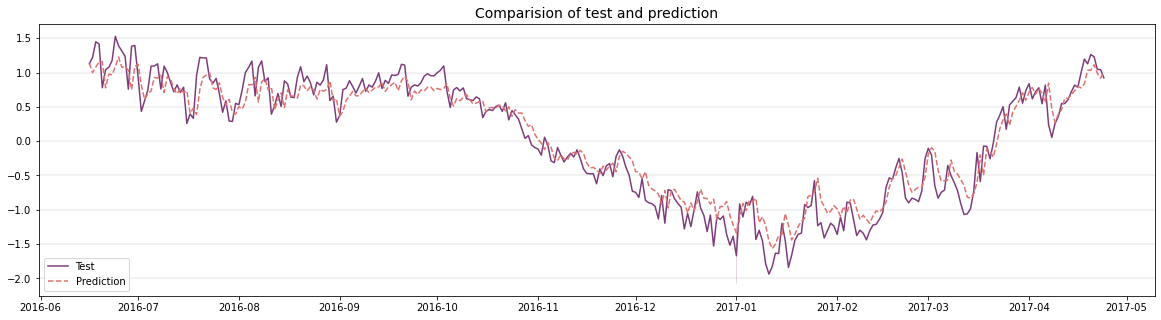

In [50]:
fig = plt.figure(figsize = (20, 5))

ax = sns.lineplot(x = data_full['date'].iloc[len(y_train) + 10:], y = y_test[:,0], color = '#7c3d7a', label = 'Test')
ax = sns.lineplot(x = data_full['date'].iloc[len(y_train) + 10:], y = prediction[:,0], color = "#de7270", label = 'Prediction', linestyle = '--', linewidth = 1.5)

ax.grid(axis = 'y', linewidth = 0.1, color = "black")
ax.set_xlabel('')
ax.set_ylabel('')

plt.title('Comparision of test and prediction', fontsize = 14)
plt.show()

------

<div style="text-align: right"> <b>Author:</b> Dawid Kapcia </div>